Exploratory Data Analysis

In [13]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Reading the data and labels from CSV files
dataset = pd.read_csv("./data/data.csv")
lb = pd.read_csv("./data/labels.csv")

In [15]:

# Merging the dataset and labels into a single dataframe
df = pd.merge(lb,dataset)
df.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [16]:
# Checking the number of null values in each column
df.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

In [17]:
# Generating descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [18]:
# removes the 'Unnamed: 0' and 'Class' columns from the dataframe
df_tsne_data = df
non_num = ['Unnamed: 0','Class']
df_tsne_data = df_tsne_data.drop(non_num, axis=1)
df_tsne_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [19]:
# Checking if the columns are numerical or not
for col in df_tsne_data.columns:
    try:
        _ = df_tsne_data[col].astype(float)
        print(f'Column {col} is numeric')
    except ValueError:
        print(f'Column {col} is not numeric')

Column gene_0 is numeric
Column gene_1 is numeric
Column gene_2 is numeric
Column gene_3 is numeric
Column gene_4 is numeric
Column gene_5 is numeric
Column gene_6 is numeric
Column gene_7 is numeric
Column gene_8 is numeric
Column gene_9 is numeric
Column gene_10 is numeric
Column gene_11 is numeric
Column gene_12 is numeric
Column gene_13 is numeric
Column gene_14 is numeric
Column gene_15 is numeric
Column gene_16 is numeric
Column gene_17 is numeric
Column gene_18 is numeric
Column gene_19 is numeric
Column gene_20 is numeric
Column gene_21 is numeric
Column gene_22 is numeric
Column gene_23 is numeric
Column gene_24 is numeric
Column gene_25 is numeric
Column gene_26 is numeric
Column gene_27 is numeric
Column gene_28 is numeric
Column gene_29 is numeric
Column gene_30 is numeric
Column gene_31 is numeric
Column gene_32 is numeric
Column gene_33 is numeric
Column gene_34 is numeric
Column gene_35 is numeric
Column gene_36 is numeric
Column gene_37 is numeric
Column gene_38 is nume

In [20]:
# import t-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=1, perplexity=3)

In [21]:
# t-SNE features are computed and a subset is printed
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:6,:]

array([[ 11.778369 ,  23.130274 ],
       [-11.184475 , -27.14426  ],
       [ -9.927377 , -27.368824 ],
       [-28.647572 , -12.786636 ],
       [ -4.6715965, -43.153397 ]], dtype=float32)

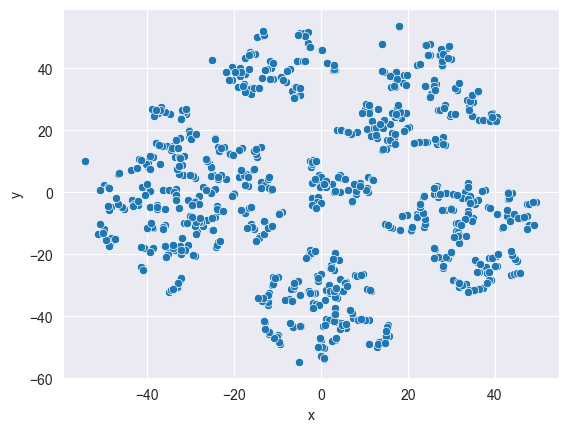

In [22]:
#Two new columns 'x' and 'y' are added to the dataframe. They correspond to the t-SNE features.
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]
# plots the t-SNE features
import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

In [23]:
df['Class']

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

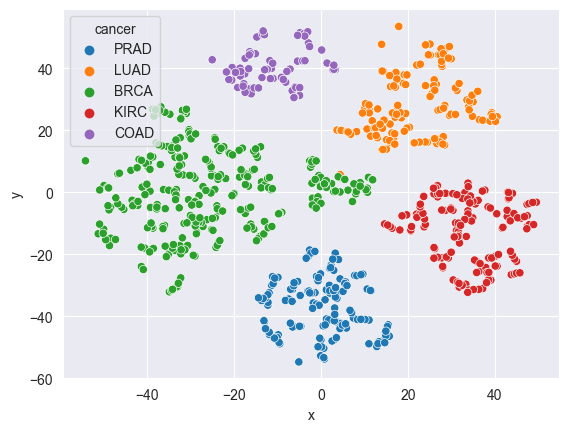

In [24]:
# The 'Class' column is added back to the dataframe under a new name 'cancer'
df_tsne_data['cancer']=df['Class']

# The t-SNE features are plotted again, but this time the points are colored based on the 'cancer' class
sns.scatterplot(x='x',y='y',hue = 'cancer', data= df_tsne_data)
plt.show()